# 01 Datasets
> Collection of toy datasets and single-cell RNA Velocity data for experimentation and testing our directed graph embedder.

In [ ]:
# default_exp 
from nbdev.showdoc import *
import numpy as np
%load_ext autoreload
%autoreload 2

This notebook contains examples of each of our datasets. We encourage other researchers to reuse them! Consider this a miniature rival of the wonderful "TADAsets" library from sklearn.

## Graph datasets

Processing...
Done!


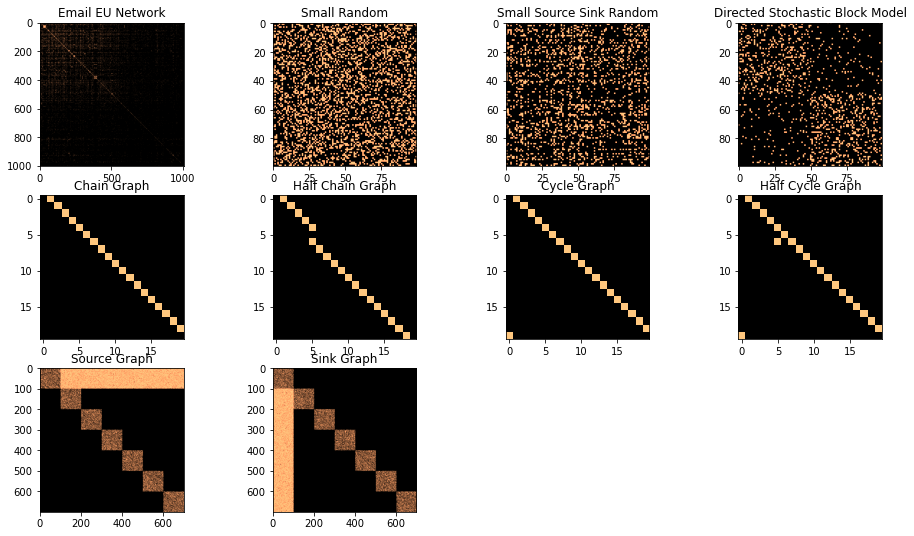

In [ ]:
# hide_input
from FRED.graph_datasets import (
    display_heatmap_galary, display_graph_galary,
    EmailEuNetwork, SourceSink, SmallRandom,
    ChainGraph, HalfChainGraph, CycleGraph, HalfCycleGraph,
    DirectedStochasticBlockModel, source_graph, sink_graph
)

dataset = [
    ("Email EU Network"                 , EmailEuNetwork()[0]),
    ("Small Random"                     , SmallRandom(num_nodes=100, prob_edge=0.3)[0]),
    ("Small Source Sink Random"         , SmallRandom(num_nodes=100, prob_edge=0.2, 
                                            pre_transform=SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
                                        )[0]),
    ("Directed Stochastic Block Model"  , DirectedStochasticBlockModel(num_nodes=100, num_clusters=2, 
                                            aij=np.array([[0.4, 0.1], [0.1, 0.4]]), 
                                            bij=np.array([[0.5, 0.5], [0.5, 0.5]])
                                        )[0]),
    ("Chain Graph"                      , ChainGraph(num_nodes=20)[0]),
    ("Half Chain Graph"                 , HalfChainGraph(num_nodes=20, center=5)[0]),
    ("Cycle Graph"                      , CycleGraph(num_nodes=20)[0]),
    ("Half Cycle Graph"                 , HalfCycleGraph(num_nodes=20, center=5)[0]),
    ("Source Graph"                     , source_graph()[0]),
    ("Sink Graph"                       , sink_graph()[0])
]
display_heatmap_galary(dataset)

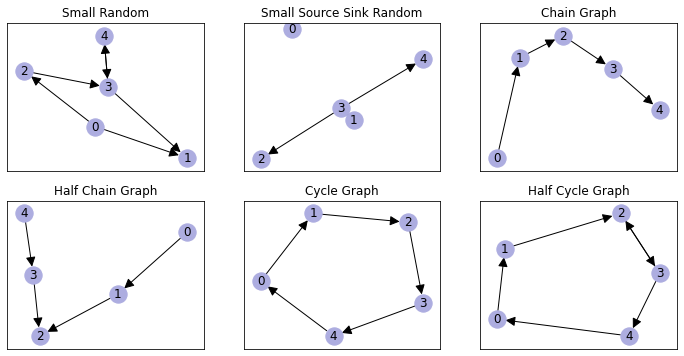

In [ ]:
# hide_input
dataset = [
    ("Small Random"                     , SmallRandom(num_nodes=5, prob_edge=0.3)[0]),
    ("Small Source Sink Random"         , SmallRandom(num_nodes=5, prob_edge=0.2, 
                                            pre_transform=SourceSink(prob_source=0.6, prob_sink=0.4, adv_prob=0.1, remove_prob=0)
                                        )[0]),
    ("Chain Graph"                      , ChainGraph(num_nodes=5)[0]),
    ("Half Chain Graph"                 , HalfChainGraph(num_nodes=5, center=2)[0]),
    ("Cycle Graph"                      , CycleGraph(num_nodes=5)[0]),
    ("Half Cycle Graph"                 , HalfCycleGraph(num_nodes=5, center=2)[0]),
]
display_graph_galary(dataset, ncol=3)

## Manifold datasets

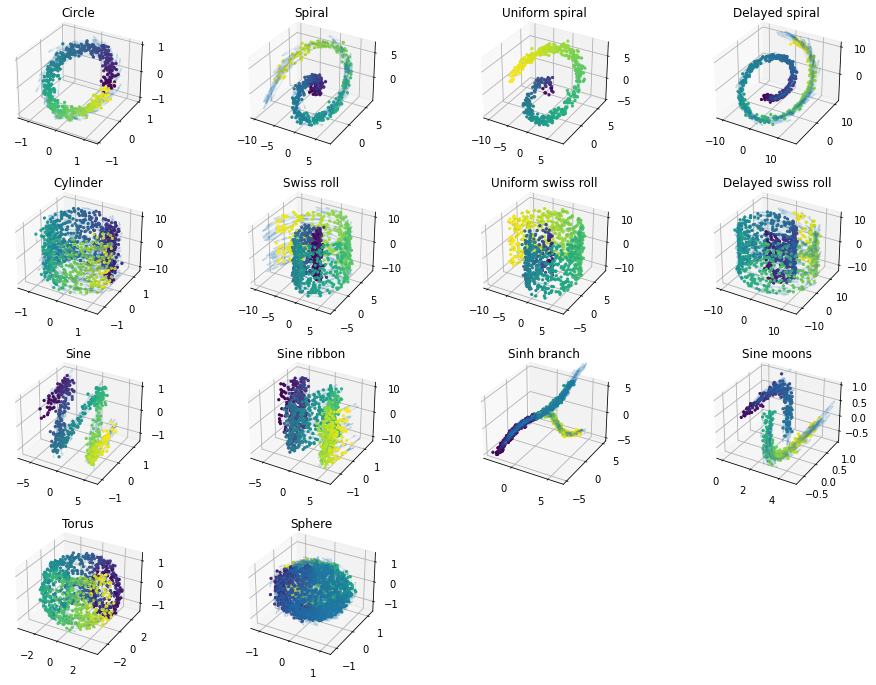

In [ ]:
# hide_input
from FRED.datasets import (
    display_flow_galary,
    directed_circle, directed_spiral, directed_spiral_uniform, directed_spiral_delayed,
    directed_cylinder, directed_swiss_roll, directed_swiss_roll_uniform, directed_swiss_roll_delayed,
    directed_sine, directed_sine_ribbon, directed_sinh_branch, directed_sine_moons,
    directed_torus, directed_sphere
)

dataset = [
    ("Circle"               , directed_circle(xtilt=np.pi/4, sigma=0.1)         ),
    ("Spiral"               , directed_spiral(xtilt=np.pi/4, sigma=0.5)         ),
    ("Uniform spiral"       , directed_spiral_uniform(xtilt=np.pi/4, sigma=0.5),),
    ("Delayed spiral"       , directed_spiral_delayed(xtilt=np.pi/4, sigma=0.5),),
    ("Cylinder"             , directed_cylinder(sigma=0.1),                     ),
    ("Swiss roll"           , directed_swiss_roll(sigma=0.3),                   ),
    ("Uniform swiss roll"   , directed_swiss_roll_uniform(sigma=0.3),           ),
    ("Delayed swiss roll"   , directed_swiss_roll_delayed(sigma=0.3),           ),
    ("Sine"                 , directed_sine(xtilt=np.pi/4, sigma=0.2),          ),
    ("Sine ribbon"          , directed_sine_ribbon(sigma=0.2),                  ),
    ("Sinh branch"          , directed_sinh_branch(xtilt=np.pi/4, sigma=0.2),   ),
    ("Sine moons"           , directed_sine_moons(xtilt=np.pi/4, sigma=0.1),    ),
    ("Torus"                , directed_torus(noise=0.1),                        ),
    ("Sphere"               , directed_sphere(noise=0.1)                        )
]
display_flow_galary(dataset)

## Single-cell datasets

In [ ]:
# hide_input
import scvelo as scv
from FRED.datasets import rnavelo_pcs

datanames = ["pancreas", "dentategyrus", "forebrain"]
for name in datanames:
    print(f"\n{'='*50}\n{name}\n{'='*50}\n")
    adata = getattr(scv.datasets, name)()
    X, flows, labels, n_pcs = rnavelo_pcs(adata)

In [ ]:
# hide_input
datanames = ["gastrulation", "gastrulation_e75", "gastrulation_erythroid"]
for name in datanames:
    print(f"\n{'='*50}\n{name}\n{'='*50}\n")
    adata = getattr(scv.datasets, name)()
    X, flows, labels, n_pcs = rnavelo_pcs(adata)

In [ ]:
# hide_input
datanames = ["dentategyrus_lamanno", "bonemarrow", "pbmc68k"]
for name in datanames:
    print(f"\n{'='*50}\n{name}\n{'='*50}\n")
    adata = getattr(scv.datasets, name)()
    X, flows, labels, n_pcs = rnavelo_pcs(adata)

In [ ]:
# hide_input
for i in range(3):
    print(f"\n{'='*50}\nsimulation {i+1}\n{'='*50}\n")
    adata = getattr(scv.datasets, "simulation")()
    X, flows, labels, n_pcs = rnavelo_pcs(adata)